In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

import os
from scipy.sparse import coo_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Loading and Preprocessing

In [16]:
df = pd.read_csv("dataset.tsv", sep="\t")
print(df.head())

                            Uniq Id            Crawl Timestamp  \
0  1705736792d82aa2f2d3caf1c07c53f4  2020-09-24 03:21:12 +0000   
1  95a9fe6f4810fcfc7ff244fd06784f11  2020-10-30 14:04:08 +0000   
2  8d4d0330178d3ed181b15a4102b287f2  2020-08-06 05:51:47 +0000   
3  fddc4df45b35efd886794b261f730c51  2020-07-15 11:22:04 +0000   
4  0990cf89a59ca6a0460349a3e4f51d42  2020-11-26T12:27:20+00:00   

   Dataset Origin                        Product Id  Product Barcode  \
0             NaN  2e17bf4acecdece67fc00f07ad62c910              NaN   
1             NaN  076e5854a62dd283c253d6bae415af1f              NaN   
2             NaN  8a4fe5d9c7a6ed26cc44d785a454b124              NaN   
3             NaN  03b5fb878a33eadff8b033419eab9669              NaN   
4             NaN  ce3d761e57d6ccad80619297b5b1bcbc              NaN   

  Product Company Type Source Product Brand Source  \
0                  Competitor                  NaN   
1                  Competitor                  NaN   
2       

In [18]:
print(df.shape)

(5000, 32)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Uniq Id                          5000 non-null   object 
 1   Crawl Timestamp                  5000 non-null   object 
 2   Dataset Origin                   0 non-null      float64
 3   Product Id                       5000 non-null   object 
 4   Product Barcode                  0 non-null      float64
 5   Product Company Type Source      5000 non-null   object 
 6   Product Brand Source             139 non-null    object 
 7   Product Brand Normalised Source  139 non-null    object 
 8   Product Name Source              139 non-null    object 
 9   Match Rank                       0 non-null      float64
 10  Match Score                      0 non-null      float64
 11  Match Type                       0 non-null      float64
 12  Retailer            

In [22]:
df.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dataset Origin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Barcode,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match Rank,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match Score,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match Type,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Price,4958.0,2.336443e+01,35.182204,0.1,8.4,1.495000e+01,2.600750e+01,7.224500e+02
Sku,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Upc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Available Inventory,5000.0,1.111111e+08,0.000000,111111111.0,111111111.0,1.111111e+08,1.111111e+08,1.111111e+08
Product Model Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.columns.tolist()

['Uniq Id',
 'Crawl Timestamp',
 'Dataset Origin',
 'Product Id',
 'Product Barcode',
 'Product Company Type Source',
 'Product Brand Source',
 'Product Brand Normalised Source',
 'Product Name Source',
 'Match Rank',
 'Match Score',
 'Match Type',
 'Retailer',
 'Product Category',
 'Product Brand',
 'Product Name',
 'Product Price',
 'Sku',
 'Upc',
 'Product Url',
 'Market',
 'Product Description',
 'Product Currency',
 'Product Available Inventory',
 'Product Image Url',
 'Product Model Number',
 'Product Tags',
 'Product Contents',
 'Product Rating',
 'Product Reviews Count',
 'Bsr',
 'Joining Key']

In [28]:
df = df[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Image Url','Product Description','Product Tags']]
df.head(5)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [30]:
df.tail(5)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
4995,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,NaN,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,NaN,NaN,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,NaN,Creed Love In Black Hair And Body Wash 6.8oz/2...
4999,0de862f8c1c4f23b6c4cfe59fd574b59,1c9e4943fd915f7b016cdc593e607e02,NaN,438.0,Beauty > Makeup > Face Makeup > Face Makeup Br...,COVERGIRL,Foundation,https://i5.walmartimages.com/asr/a76122fd-322a...,Mousse foundation that gives you a smooth clea...,"Foundation, Wal-mart, Walmart.com"


In [32]:
df.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [34]:
df['Product Rating'] = df['Product Rating'].fillna(df['Product Rating'].mean())
df['Product Reviews Count'] = df['Product Reviews Count'].fillna(0)
df['Product Category'] = df['Product Category'].fillna(0)
df['Product Brand'] = df['Product Brand'].fillna('')
df['Product Description'] = df['Product Description'].fillna('')

In [36]:
df.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [38]:
df.nunique()

Uniq Id                  5000
Product Id               4802
Product Rating             36
Product Reviews Count     778
Product Category          989
Product Brand            1601
Product Name             4921
Product Image Url        4945
Product Description      3760
Product Tags             4921
dtype: int64

In [40]:
df.duplicated().sum()

0

In [42]:
print(df.columns)

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags'],
      dtype='object')


In [44]:
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags'
}
df.rename(columns=column_name_mapping, inplace=True)

In [46]:
df

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,4.294622,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,4.294622,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.500000,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,4.294622,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,4.294622,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,4.500000,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,3.900000,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,4.294622,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,4.294622,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [48]:
df['ID'] = df['ID'].str.extract(r'(\d+)').astype(float)
df['ProdID'] = df['ProdID'].str.extract(r'(\d+)').astype(float)                    

In [50]:
df

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,4.294622,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,4.294622,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.500000,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,4.294622,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,4.294622,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.500000,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0.000000e+00,1.0,3.900000,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,3.400000e+01,96.0,4.294622,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,9.000000e+00,7.0,4.294622,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


## EDA

In [53]:
num_users = df['ID'].nunique()
num_items = df['ProdID'].nunique()
num_ratings = df['Rating'].nunique()
print(f"Number of unique users:{num_users}")
print(f"Number of unique itms:{num_items}")
print(f"Number of unique ratings:{num_ratings}")

Number of unique users:1721
Number of unique itms:1697
Number of unique ratings:36


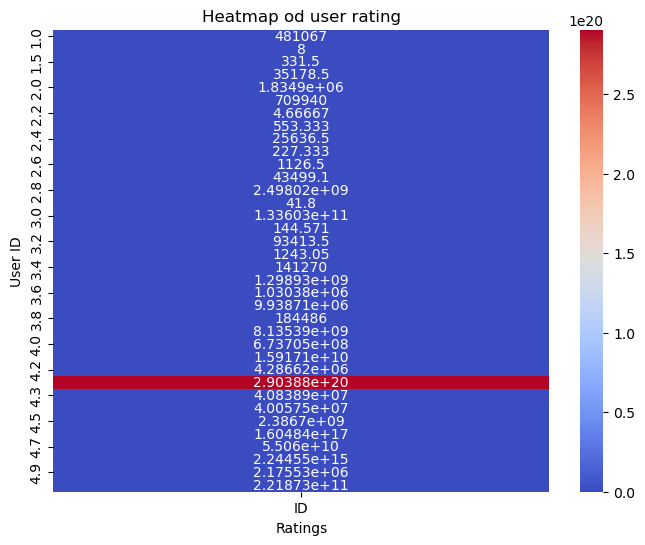

In [55]:
heatmap_data = df.pivot_table('ID','Rating')


plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap od user rating')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

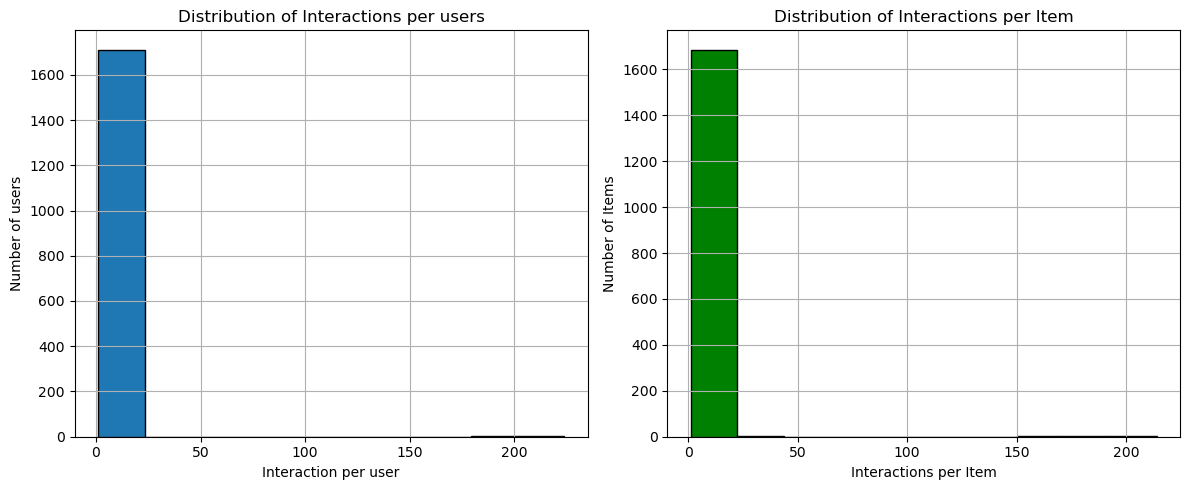

In [56]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interaction per user')
plt.ylabel('Number of users')
plt.title('Distribution of Interactions per users')

plt.subplot(1, 2, 2)
df['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

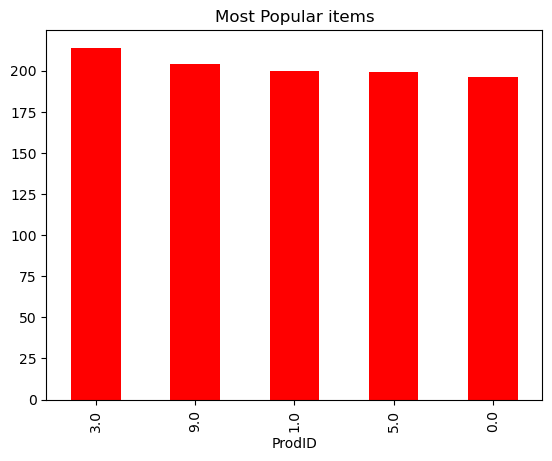

In [59]:
# Most popular items

popular_items = df['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

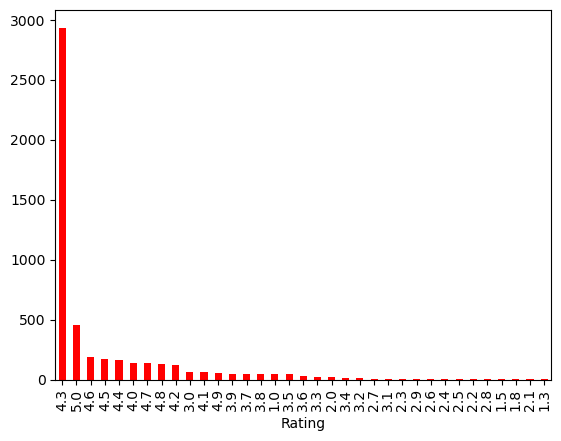

In [61]:

# most rated counts
df['Rating'] = df['Rating'].round(1)
df['Rating'].value_counts().plot(kind='bar',color='red')

## Step 3: Data Cleaning and Tags Creations

In [64]:
import sys
print(sys.executable)

C:\conda\python.exe


In [66]:
!{sys.executable} -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     --- ------------------------------------ 1.0/12.8 MB 1.9 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 2.1 MB/s eta 0:00:06
     -------- ------------------------------- 2.6/12.8 MB 2.7 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.8 MB 3.1 MB/s eta 0:00:04
     --------------- ------------------------ 5.0/12.8 MB 3.6 MB/s eta 0:00:03
     ----------------- ---------------------- 5.5/12.8 MB 3.7 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 3.8 MB/s eta 0:00:02
     ------------------------- -------------- 8.1/12.8 MB 4.1 MB/s eta 0:00:02
     ----------------------------- ---------- 9.4/12.8 MB 4.3 MB/s eta 0:

In [67]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

EXTRA_STOPWORDS = {"product", "item", "brand", "category", "description"}

def clean_and_extract_tags(text):
    if not isinstance(text, str):
        text = str(text)

    doc = nlp(text.lower())

    tags = [
        token.lemma_
        for token in doc
        if token.text.isalnum()                  
        and token.text not in STOP_WORDS        
        and token.lemma_ not in EXTRA_STOPWORDS  
    ]

    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    df[column] = df[column].apply(clean_and_extract_tags)

In [68]:
df['Tags'] = df[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

## Rating Base Recommendations System

In [74]:

average_ratings = df.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [76]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [78]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

In [80]:

print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


,Name,ReviewCount,Brand,ImageURL,Rating
629,Anti-Blemish Solutions Clearing Concealer - # ...,1,clinique,https://i5.walmartimages.com/asr/d584f39c-9920...,5
4723,Victorias Secret Pure Seduction Ultra-Moisturi...,1,"victoria, secret",https://i5.walmartimages.com/asr/69caff2b-ecc9...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3596,Parfums de Marly Delina by Parfums de Marly Bo...,1,"parfums, de, marly",https://i5.walmartimages.com/asr/cbf45025-c356...,5
4201,Sensationail Gel Nail Color Polish &quotFuchsi...,1,sensationail,https://i5.walmartimages.com/asr/03c2bbf8-f4bd...,5
1606,"Dr Tobias Candida Support Capsules, 120 Ct",1,"dr, tobia",https://i5.walmartimages.com/asr/3a072b9a-cc7b...,5
1608,Dr. Adorable - 100% Pure Rice Bran Oil Organic...,1,"dr, adorable",https://i5.walmartimages.com/asr/48d56f9a-8f36...,5
312,3 Pack - Taro Clotrimazole 7 Vaginal Cream 45 g,1,taro,https://i5.walmartimages.com/asr/3b603ed2-e155...,5
311,3 Pack - Sure Anti-Perspirant Deodorant Origin...,1,sure,https://i5.walmartimages.com/asr/4e2d42e6-7f53...,5
4204,Sensible Remedies Clary Sage 100% Therapeutic ...,1,"sensible, remedy",https://i5.walmartimages.com/asr/b8321ec4-4dd6...,5


## Content Base Recommendation system (User Preferences or Items similarities)

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [85]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = df[df['Name']==item_name].index[0]

In [87]:

similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [89]:

similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [91]:

df.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


## Function To Recommend Products for Content Base

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(df, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in df['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = df[df['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = df.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [96]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(df, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,4.3
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,4.3
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,4.3
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,4.3
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,4.3
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [98]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(df, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/8312221b-ed22...,4.3
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,4.3
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,color,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,color,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetic,https://i5.walmartimages.com/asr/e2d30304-edc9...,4.3


## Collaborative Filtering (User Item Similarity)

In [101]:
user_item_matrix = df.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [103]:
user_similarity = cosine_similarity(user_item_matrix)

In [105]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [107]:
user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [109]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = df[df['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [111]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
31,Head & Shoulders Dandruff Conditioner Dry Scal...,0.0,"head, shoulder",https://i5.walmartimages.com/asr/a924d53f-007d...,4.3
37,Wahl Color Pro Plus Haircut Kit 79752T,388.0,wahl,https://i5.walmartimages.com/asr/244aef35-aea3...,4.7
40,"Pantene Pro-V Repairing Mask Treatment, Gold S...",176.0,pantene,https://i5.walmartimages.com/asr/fbd2ba15-5051...,4.1
56,Grisi Soap - Avena Oat 3.5 Oz,0.0,grisi,https://i5.walmartimages.com/asr/aecd4fd9-bfec...,4.3
58,"Humco Holding Group Glycerin, 16 Fl. Oz.",1.0,humco,https://i5.walmartimages.com/asr/52f2515b-09ca...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
128,"Navitas Organics, Organic, Goji Berries, 16 oz...",0.0,"navitas, organic",https://i5.walmartimages.com/asr/721ba73b-d4d5...,4.3
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,4.3
147,Olay Complete Daily Moisturizer for Sensitive ...,737.0,olay,https://i5.walmartimages.com/asr/f8946948-5c8a...,4.7


## Function That Recommend Items

In [114]:
def collaborative_filtering_recommendations(df, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = df.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = df[df['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(df, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
31,Head & Shoulders Dandruff Conditioner Dry Scal...,0.0,"head, shoulder",https://i5.walmartimages.com/asr/a924d53f-007d...,4.3
37,Wahl Color Pro Plus Haircut Kit 79752T,388.0,wahl,https://i5.walmartimages.com/asr/244aef35-aea3...,4.7
40,"Pantene Pro-V Repairing Mask Treatment, Gold S...",176.0,pantene,https://i5.walmartimages.com/asr/fbd2ba15-5051...,4.1
56,Grisi Soap - Avena Oat 3.5 Oz,0.0,grisi,https://i5.walmartimages.com/asr/aecd4fd9-bfec...,4.3
58,"Humco Holding Group Glycerin, 16 Fl. Oz.",1.0,humco,https://i5.walmartimages.com/asr/52f2515b-09ca...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
128,"Navitas Organics, Organic, Goji Berries, 16 oz...",0.0,"navitas, organic",https://i5.walmartimages.com/asr/721ba73b-d4d5...,4.3
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,4.3
147,Olay Complete Daily Moisturizer for Sensitive ...,737.0,olay,https://i5.walmartimages.com/asr/f8946948-5c8a...,4.7


## Hybrid Recommendations

In [117]:

# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(df,target_user_id, item_name, top_n=10):
    content_based_rec = content_based_recommendations(df,item_name, top_n)
    collaborative_filtering_rec = collaborative_filtering_recommendations(df,target_user_id, top_n)
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    return hybrid_rec.head(10)

In [119]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  
hybrid_rec = hybrid_recommendations(df,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,4.3
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,4.3
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,4.3
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,4.3
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,4.3
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,4.3
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,4.3


In [121]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(df,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/25b4b467-bc61...,4.3
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/8312221b-ed22...,4.3
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetic",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
3206,"Revlon Ultra HD Vinyl Lip Polish, Liquid Lipst...",2039.0,revlon,https://i5.walmartimages.com/asr/4d4c21d8-da3c...,4.3
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetic,https://i5.walmartimages.com/asr/e2d30304-edc9...,4.3
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,color,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,4.3
